# Credit Repayment Ability – Social Factors Analysis

The lending department of a bank is building a credit rating system for future clients; to this end, the department has requested an analysis of how social factors influence lendees' ability to repay debt. The dataset provided includes information such as marital status, number of children, education, and employment information, amongst other categories. This information is to be analyzed with regard to data (also in the dataset) about the lendees having paid back or not having paid back their loans.

## Обзор данных

In [1]:
# import pandas, читать файл, вывести обзор данных и первые строки
import pandas as pd
from pymystem3 import Mystem

credit_data = pd.read_csv('datasets/data.csv')
print('Обзор таблицы с данными: \n')
credit_data.info()
print('\n\n Первые пять строк необработанной таблицы:')
display(credit_data.head(10))

Обзор таблицы с данными: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


 Первые пять строк необработанной таблицы:


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Вывод**

***Ознакомление с данными***

Вывел информацию о датафрейме чтобы:

    - смотреть на виды данных в разных столбцах; это поможет понять, в правильной ли форме (категоричной, числительной, и т.д.) находятся данные
    - видеть различия между количеством значений в разных столбцах; это поможет выяснить, где и какие данные отсутсвуют
    - видеть общее количество данных
    
Вывел первые строчки датафрейма чтобы:

    - видеть насколько однообразно введенные данные; сразу видно, что данные введены со многими отличиями, с которыми придётся разбираться при их предобработке. Например, заметно, что уровень образования написан иногда с гаглавными буквами, иногда без, или что есть ортрицатнельные числа в столбце с трудовым стажем.

## Предобработка данных

### Обработка пропусков

Благодаря выводу `info` , знаем что пропуски в данных находятся только в двух столбцах: 'days_employed'  и  'total_income'

days_employed:

    - Этот столбец содержит количество проработанных дней для каждого человека
    - Эта информация не нужна для этого проекта, поэтому можно устранять целый этот столбец и не обработать находящиеся там пропуски
        
total_income:

    - Этот столбец содержит месячную зарплату каждого человека
    - Значения – вещественные числовые (float)
    
Подход:

        - зарплаты разных людей могут сильно отличаться друг от друга, так что вероятно лучше использовать медиану, чтобы заменить пропуски
        - но, выборка данных может содержать более тесный диапазон зарплат, так что ещё стоит смотреть на медиану и на среднее арифматическое
        - решать надо, заменять пропуски или устранять строки с пропусками: эти данные могут оказаться очень значительными для данной задачи, так что нужно думать о том, лучше использовать неверные данные для анализа или лучше терять большое количество данных
    

In [2]:
# Подсчёт общих медианы и средного арифматического
print(f'Медиана значений столбца \'total_income\' : {credit_data["total_income"].median()}')
print(f'Среднее арифматическое значений столбца \'total_income\' : {credit_data["total_income"].mean()}')

Медиана значений столбца 'total_income' : 145017.93753253992
Среднее арифматическое значений столбца 'total_income' : 167422.3022081719


**Выяснение**

Медиана и среднее арифматическое 'total_income' довольно близки друг к другу. Это наверно говорит о выборке, то есть о том, что люди, у которых зарплаты очень высокие (данные которых изменили бы среднее арифматическое больше чем медиану), возможно не берут кредит.

Однако, есть широкий возрастной диапазон в выборке, поэтому лучше пересчитать медиану и среднее арифматическое по возрастным группам.

In [3]:
print(credit_data['income_type'].unique())

['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']


In [33]:
work_groups = ['сотрудник', 'пенсионер', 'компаньон', 'госслужащий', 'безработный',
 'предприниматель', 'студент', 'в декрете']

for group in work_groups:
    median_income = credit_data[(credit_data['income_type'] == group)]['total_income'].median()
    mean_income = credit_data[(credit_data['income_type'] == group)]['total_income'].mean()
    print(f'Для типа заятности "{group}": \n медиана total_income: {median_income:>20} \n среднее арифматическое total_income: {mean_income:>15} \n\n')
    



Для типа заятности "сотрудник": 
 медиана total_income:             142594.0 
 среднее арифматическое total_income: 159566.2629014796 


Для типа заятности "пенсионер": 
 медиана total_income:             118514.0 
 среднее арифматическое total_income: 135250.6045965004 


Для типа заятности "компаньон": 
 медиана total_income:             172357.0 
 среднее арифматическое total_income: 199451.22508861756 


Для типа заятности "госслужащий": 
 медиана total_income:             150447.0 
 среднее арифматическое total_income: 168862.54358270418 


Для типа заятности "безработный": 
 медиана total_income:             131339.0 
 среднее арифматическое total_income:        131339.0 


Для типа заятности "предприниматель": 
 медиана total_income:             499163.0 
 среднее арифматическое total_income:        499163.0 


Для типа заятности "студент": 
 медиана total_income:              98201.0 
 среднее арифматическое total_income:         98201.0 


Для типа заятности "в декрете": 
 мед

In [5]:
# Проверка типа занятности заёмщиков, у которых зарплата – NaN
print(credit_data[credit_data['total_income'].isna()]['income_type'].value_counts())

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64


In [34]:
# Замена пропусков в каждой группе в списке
for group in work_groups:
    credit_data.loc[(credit_data['income_type'] == group) \
                    & (credit_data['total_income'].isna() == True),'total_income'] \
    = credit_data[credit_data['income_type'] == group]['total_income'].median()

print(len(credit_data[credit_data['total_income'].isna()]))



0


***Выводы***

**Виды пропущенных значений**

Имеются пропуски в столбцах 'total_income' и 'days_employed', о зарплате и трудовом стаже соответственно. Оба этих столбца содержат вещественные числовые значения, но нам интересен только столбец 'total_income'.

**Причниы пропусков**

Нам неизвестны методы получения данных, поэтому пропуски могли бы появляться по разным причинам.

Если заёмщики сами выполняли анкеты при получении кредита, тогда это возможно, что эту информацию не указывали, или что информация указана в нечитабельном виде. Однако, в том, что касается столбца о зарплате, это скорее возможно только если анкеты выполнялись вручную; вряд ли электронная анкета для получения кредита бы допускала пропуск в поле для зарплаты.

Если речь идёт о электронной анкете, возможно, что заёмщики записали информацию в неправильной форме, а потом система, обрабатывающая эти данные, выполняла эти неправильные значения с NaN. Например, вполне возможно, что человек бы указывал свою зарплату как 100k, или же 100000/месяц, или тому подобное.

Также возможно, что эта таблица составлена с данными из других таблиц. Если информация о зарплате была получена с источника, для которого доход не имеет такое важное значение, тогда возможно, что это поле (допустим электронной анкеты) было необязательным в той анкете, и соответсвенно, что информаця просто отсутствует.

Последнее, что стоит здесь отметить, это то, что вряд ли NaN означает, что у заёмщика нет никакой, или нет официальной, зарплаты. Поскольку около половины заёмщиков с NaN в столбце зарплаты имеет тип зантяности "сотрудник", такой вывод кажется нелогичным.

Информация о рабочем стаже для данного анализа незначительна, но также можно делать похожие предположения и для этого. Здесь, с учётом отрицательных чисел в дополнение к пропускам, логично было бы, что информация была указана в неправильном виде.


**Подход к заполнению пропусков**

Для заполнения пропусков, использована медиана, посчитанная для кажой профессии. 

Из-за присуствия различий между медианой и средным арифматическим, стоит использовать медиану для замены пропусков. Новые значения по группам являются более точной заменой чем была бы общая медиана.

### Замена типа данных

Поскольку нас не интересуют значения в столбце 'days_employed', единственные вещественные числа, которые надо перевести на целочисленные, находятся в столбце 'total_income'.

Подход:

    - применить метод .astype() на целый столбец
    - я нашёл на stackexchange, что при переводе с float на int, python округляет числа не в обычном смысле, а делает нижнее округление. Поскольку речь идёт о месячной зарплате, этот факт не должен влиять на результаты.
    - проверить, что замена произошла успешно с помощью .info()

In [7]:
# Замена типа данных 'float' типом 'int'
credit_data['total_income'] = credit_data['total_income'].astype('int64')
print(credit_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int64  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.0+ MB
None


***Вывод***

С помощью метода `.astype()`, данные вещественного типа успешно переведены на тип целочисленный. Этот метод правильный подход, поскольку нужно было перевести данные типа float в тип int. Бывает, что нужно переводить строковые значения в числовые, а для этого можно пользоваться методом `.to_numeric()`, но это не было такой случай.

### Обработка дубликатов

In [8]:
# проверка таблицу за дубликаты
print(len(credit_data[credit_data.duplicated()==True]))
# устранение дубликатов
credit_data = credit_data.drop_duplicates(inplace=False)
# проверка успешности устранения
print(len(credit_data[credit_data.duplicated()==True]))

54
0


In [9]:
print(credit_data['education'].unique())

['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']


In [10]:
# Устранение неявных дубликатов в столбце об образовании
credit_data['education'] = credit_data['education'].str.lower()
print(credit_data['education'].unique())

# Перепроверка дубликатов
print(len(credit_data[credit_data.duplicated()==True]))

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']
17


После устранение неявных дубликатов в столбце об образовании, выяснилось, что есть другие, раньше не обнаруженные явные дубликаты. Устраню их с помощью `.drop_duplicates`, потом перепроверяю.

In [11]:
# устранение дубликатов
credit_data = credit_data.drop_duplicates(inplace=False)
# проверка успешности устранения
print(len(credit_data[credit_data.duplicated()==True]))

0


***Вывод***

**Подход**

Проверка спосбом `.duplicated` показала, что имеются 54 яыных дубликатов в таблице данных. Они были устранены с методом `.drop_duplicates()`. Повторная проверка потвердила, что дубликаты успешны устранены.

С помощью `.unique()` были обнаружены неявные дубликаты в столбце 'education'. Это было из-за того, что такая же информация об образовании было написана то ли с заглавными буквами, то ли со строчными буквами. Благодаря `.str.lower()` неверно введенные значения были исправлены.

**Причины присутствия дубликатов**

Насчёт неявных дубликатов в столбце 'education', очень похоже на то, что человеческий фактор ялвлялся главной причиной для присутствия этих дубликатов. Похоже на то потому, что заглавные буквы иногда появлялись только в начале слов (то есть, это не было только то, что некоторые примеры были целиком написаны заглавными буквами), а такой подход к писанию очень даже человеческим является.

Труднее определить причины за присутствие явных дубликатов. Из-за того, что количество таких дубликатов сравнительно очень маленькое (54/21525), кажется, что тут тоже возможно, что человеческий фактор подействал. Например, количество людей очень большое, а можно предполагать, что 54 из этих тысячей напросто забыли, что уже выполнили анкету, а потом переполняли её.

Также не исключено, что выполнение какой-нибудь функции в системе привело к ошибочному созданию новых строк с информацией из другой строки.

### Лемматизация

In [12]:
# лемматизация всех значений в столбце с данными о цели кредита
m = Mystem()
credit_data['purpose'] = [m.lemmatize(text) for text in credit_data['purpose']]


# Обработка полученных лемм, чтобы они сохранялись как строка а не как список; устранение значения '\n'
credit_data['purpose'] = [''.join(words).replace('\n', '') for words in credit_data['purpose']]
credit_data['purpose'].to_frame()

,purpose
0,покупка жилье
1,приобретение автомобиль
2,покупка жилье
3,дополнительный образование
4,сыграть свадьба
...,...
21520,операция с жилье
21521,сделка с автомобиль
21522,недвижимость
21523,на покупка свой автомобиль


***Вывод***

Процесс лемматизации по порядку:

    - Подключение функции Mystem() с библиотеки pymystem3
    - Присваивание переменной 'm' вызова Mystem()
        - Этот этап не обязателен – можно было дальше использовать Mystem().lemmatize() вместо m.lemmatize()
    - Использование list comprehension чтобы быстро/по проще применять .lemmatize() на каждый элемент в серии credit_data['purpose'] и одновременно присваивать эти новые значения той самой серии (переписывая её)
    - Переписание новых значений credit_data['purpose'], которые в тот момент сохранялись как список (получается, что серия содержала списки, а не строки), в строки, при этом удаляя элемент '\n' с каждого списка
        - для этого тоже использовалось list comprehension, но в этот раз с методами строк .join() и .replace()
    - Проверка новых значений в серии

### Категоризация данных

**Общий подход к категоризации**

Цель категоризации здесь является перевод все значения в таблице в удобную форму для разных расчётов, то есть перевод все нечисловые значения в числовые и группирование всех числовых значений, чтобы их было легче понять.

Первым шагом является категоризация и/или перевод.
Потом, создам новую таблицу с новыми значениями. Эту таблицу можно будет потом использовать для расчётов.

**Подход к категоризации целей кредита**

В создании категорий целей кредита, воспользуюсь леммами чтобы определить общие группы по темам, потом перепишу значения в этом столбце темами этих найденных общих групп

In [13]:
# Вывод всех целей, группированных по темам
purpose_unique = credit_data['purpose'].unique()
themes = ['автомобиль', 'коммерческий недвижимость', 'недвижимость', 'жилье', 'свадьба', 'образование']
for theme in themes:
    purpose_list = []
    for purpose in purpose_unique:
        if theme in purpose:
            purpose_list.append(purpose)
    print(f'Цель связана с {theme}: {purpose_list} \n')


Цель связана с автомобиль: ['приобретение автомобиль', 'на покупка подержать автомобиль', 'на покупка свой автомобиль', 'автомобиль', 'сделка с подержанный автомобиль', 'свой автомобиль', 'сделка с автомобиль', 'на покупка автомобиль'] 

Цель связана с коммерческий недвижимость: ['покупка коммерческий недвижимость', 'операция с коммерческий недвижимость'] 

Цель связана с недвижимость: ['покупка недвижимость', 'покупка коммерческий недвижимость', 'покупка жилой недвижимость', 'строительство собственный недвижимость', 'недвижимость', 'строительство недвижимость', 'операция с коммерческий недвижимость', 'строительство жилой недвижимость', 'операция со свой недвижимость', 'операция с недвижимость'] 

Цель связана с жилье: ['покупка жилье', 'операция с жилье', 'покупка жилье для семья', 'жилье', 'покупка свой жилье', 'покупка жилье для сдача', 'ремонт жилье'] 

Цель связана с свадьба: ['сыграть свадьба', 'на проведение свадьба', 'свадьба'] 

Цель связана с образование: ['дополнительный обр

In [14]:
# Категоризация значений в 'purposes'

def categorize_purpose(row):
    themes = ['автомобиль', 'коммерческий недвижимость', 'недвижимость', 'жилье', 'свадьба', 'образование']
    for theme in themes:
        purpose_list = []
        for purpose in purpose_unique:
            if theme in purpose:
                purpose_list.append(purpose)
        if row['purpose'] in purpose_list:
            return theme
    
credit_data['purpose'] = credit_data.apply(categorize_purpose, axis=1)
credit_data.loc[(credit_data['purpose'] == 'жилье') | (credit_data['purpose'] == 'недвижимость'), 'purpose'] = 'частная недвижимость'
credit_data.loc[credit_data['purpose'] == 'коммерческий недвижимость', 'purpose'] = 'коммерческая недвижимость'
# проверка новых значений в столбце 'purpose'
print(credit_data['purpose'].unique())

['частная недвижимость' 'автомобиль' 'образование' 'свадьба'
 'коммерческая недвижимость']


In [15]:
#  Категоризация по цели приобретения кредита

purpose_dict = {'частная недвижимость':0, 'коммерческая недвижимость':1, 'автомобиль':2, 'образование':3, 'свадьба':4}
purpose_series = pd.Series(purpose_dict)
purpose_series = purpose_series.rename_axis('purpose')
display(purpose_series.to_frame())

def purpose(purpose):
    if purpose == 'частная недвижимость':
        return 0
    if purpose == 'коммерческая недвижимость':
        return 1
    if purpose == 'автомобиль':
        return 2
    if purpose == 'образование':
        return 3
    if purpose == 'свадьба':
        return 4
    
credit_data['purpose_id'] = credit_data['purpose'].apply(purpose)
display(credit_data.head())

,0
purpose,
частная недвижимость,0
коммерческая недвижимость,1
автомобиль,2
образование,3
свадьба,4


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_id
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,частная недвижимость,0
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,2
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,частная недвижимость,0
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,3
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,4


**Подход к категоризации 'children'**

По сравнению с другими людьми в таблице, людей, у которых три ребёнка или больше, мало. Поскольку таблица содержит информацию про тысячи людей, значения 9, 41, и даже 330 (для 5, 4, и 3 детей относительно) кажутся недостаточно объёмной выборкой для сравнения с другими данными. Это особенно так для людей, у которых 5 детей, поскольку информация о девятерых людей скорее говорит о личных историях, а не о общественной тенденции.

Из-за этого, создам 4 категории для количества детей: {'бездетный':0, 'один_ребёнок':1, 'два_ребёнка':2, 'три\_или\_больше':3}

Тем не менее, надо потом проверить, правильно ли это решение, сравнивая результаты операций с 'три\_и\_больше' с результатами тех же операций для выборки определенной по точному количеству детей.

Также, хотя не обязательно создать категории в коде для этого чтобы провести анализ, будут по факту и категории бездетные люди и люди с детьми.

In [16]:
# проверка значения 20 в столбце 'children'
print(len(credit_data[credit_data['children']==20]))
print(len(credit_data[(credit_data['children'] == 20) & ((credit_data['family_status'] == 'женат / замужем') | \
                                                        (credit_data['family_status'] == 'гражданский брак'))] ))

76
61


Значения 20 и -1 явно ошибочно введенные в таблицу. Судя по семейным положениям строк, у которых в 'children' значение 20, вероятнее всего, что 20 является ошибочным введением значения 2. Чтобы исправить эти ошибки, переведу -1 на 1 и 20 на 2.

In [17]:
# замена неверно введенных значений в 'children'
credit_data.loc[credit_data['children'] == -1, 'children'] = 1
credit_data.loc[credit_data['children'] == 20, 'children'] = 2

In [35]:
# Ознакомление с информацией о детях, чтобы понять, стоит ли использовать категории вместо точного количества детей,
# а если да, тогда как именно определить эти категории.
children_list = ['детей', 'ребёнок', 'ребёнка', 'ребёнка', 'ребёнка', 'детей']

for i in range(0, 6):
    print(f'Количество людей, у которых {i} {children_list[i]}: {len(credit_data[credit_data["children"]==i])}')

Количество людей, у которых 0 детей: 14091
Количество людей, у которых 1 ребёнок: 4855
Количество людей, у которых 2 ребёнка: 2128
Количество людей, у которых 3 ребёнка: 330
Количество людей, у которых 4 ребёнка: 41
Количество людей, у которых 5 детей: 9


In [19]:
#  Категоризация по количеству детей этап 1: определение групп
def categorize_children(row):
    children = row['children']
    if children == 0:
        return 'бездетный'
    if children == 1:
        return 'один_ребёнок'
    if children == 2:
        return 'два_ребёнка'
    if children >= 3:
        return 'три_или_больше'
    
credit_data['children_group'] = credit_data.apply(categorize_children, axis=1)

In [20]:
#  Категоризация по количеству детей этап 2: создание словаря для новых групп

children_dict = {'бездетный':0, 'один_ребёнок':1, 'два_ребёнка':2, 'три_или_больше':3}
children_series = pd.Series(children_dict)
children_series = children_series.rename_axis('children_group')
display(children_series.to_frame())

def children(children):
    if children == 'бездетный':
        return 0
    if children == 'один_ребёнок':
        return 1
    if children == 'два_ребёнка':
        return 2
    if children == 'три_или_больше':
        return 3
 
    
credit_data['children_id'] = credit_data['children_group'].apply(children)
credit_data['children_bool'] = credit_data['children_id'] != 0
display(credit_data.head())

,0
children_group,
бездетный,0
один_ребёнок,1
два_ребёнка,2
три_или_больше,3


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_id,children_group,children_id,children_bool
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,частная недвижимость,0,один_ребёнок,1,True
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,2,один_ребёнок,1,True
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,частная недвижимость,0,бездетный,0,False
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,3,три_или_больше,3,True
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,4,бездетный,0,False


**Подход к категоризации возрастных групп**

Создам 4 возрастных группы по возрастанию чтобы можно было потом использовать эти группы с методом .corr()


In [21]:
#  Категоризация по возрасту

age_dict = {'<30':0, '30-50':1, '50-65':2, '>65':3}
age_dict_series = pd.Series(age_dict)
age_dict_series = age_dict_series.rename_axis('age_group')
display(age_dict_series.to_frame())

def age_group(age):
    if age < 30:
        return 0
    if age >= 30 and age < 50:
        return 1
    if age >= 50 and age < 65:
        return 2
    if age >=65:
        return 3
    
credit_data['age_group_id'] = credit_data['dob_years'].apply(age_group)
display(credit_data.head())


,0
age_group,
<30,0
30-50,1
50-65,2
>65,3


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_id,children_group,children_id,children_bool,age_group_id
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,частная недвижимость,0,один_ребёнок,1,True,1
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,2,один_ребёнок,1,True,1
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,частная недвижимость,0,бездетный,0,False,1
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,3,три_или_больше,3,True,1
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,4,бездетный,0,False,2


**Подход к категоризации видов дохода**

Поскольку вид дохода нельзя относить к числу или организовать в логической иерархии, нельзя будет использовать .corr() чтобы определять коррелацию позже. Зато, легче обрабатывать данные в виде чисел, так что создам категории чтобы вписать эти значения в используемой форме в таблицу с другими категориями.

In [22]:
#  Категоризация по виду дохода

income_type_dict = {'сотрудник':0, 'пенсионер':1, 'компаньон':2, 'госслужащий':3, 'безработный':4,
 'предприниматель':5, 'студент':6, 'в декрете':7}
income_type_series = pd.Series(income_type_dict)
income_type_series = income_type_series.rename_axis('income_type')
display(income_type_series.to_frame())

def income_type(income):
    if income == 'сотрудник':
        return 0
    if income == 'пенсионер':
        return 1
    if income == 'компаньон':
        return 2
    if income == 'госслужащий':
        return 3
    if income == 'безработный':
        return 4
    if income == 'предприниматель':
        return 5
    if income == 'студент':
        return 6
    if income == 'в декрете':
        return 7
    
credit_data['income_type_id'] = credit_data['income_type'].apply(income_type)
display(credit_data.head())

,0
income_type,
сотрудник,0
пенсионер,1
компаньон,2
госслужащий,3
безработный,4
предприниматель,5
студент,6
в декрете,7


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_id,children_group,children_id,children_bool,age_group_id,income_type_id
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,частная недвижимость,0,один_ребёнок,1,True,1,0
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,2,один_ребёнок,1,True,1,0
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,частная недвижимость,0,бездетный,0,False,1,0
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,3,три_или_больше,3,True,1,0
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,4,бездетный,0,False,2,1


**Подход к категоризации уровня образования**

Создам 5 групп для категоризации уровня образования. Чем больше лет образования, тем больше значение категории. Таким образом, можно будет использовать эти категории для таких операций как .corr().

In [23]:
#  Категоризация по уровню образования

education_dict = {'начальное':0, 'среднее':1, 'неоконченное высшее':2, 'высшее':3, 'ученая степень':4}
education_series = pd.Series(education_dict)
education_series = education_series.rename_axis('education')
display(education_series.to_frame())

def education(education):
    if education ==  'начальное':
        return 0
    if education ==  'среднее':
        return 1
    if education ==  'неоконченное высшее':
        return 2
    if education ==  'высшее':
        return 3
    if education ==  'ученая степень':
        return 4
    
credit_data['education_id'] = credit_data['education'].apply(education)
display(credit_data.head())


,0
education,
начальное,0
среднее,1
неоконченное высшее,2
высшее,3
ученая степень,4


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_id,children_group,children_id,children_bool,age_group_id,income_type_id
0,1,-8437.673028,42,высшее,3,женат / замужем,0,F,сотрудник,0,253875,частная недвижимость,0,один_ребёнок,1,True,1,0
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,2,один_ребёнок,1,True,1,0
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,частная недвижимость,0,бездетный,0,False,1,0
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,3,три_или_больше,3,True,1,0
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,4,бездетный,0,False,2,1


**Подход к категоризации пола**

Данные про пол впишу в таблицу как 0 или 1, чтобы можно было использовать их в арифматических операциях.

In [24]:
#  Категоризация по полу

gender_dict = {'M':0, 'F':1,}
gender_series = pd.Series(gender_dict)
gender_series = gender_series.rename_axis('gender')
display(gender_series.to_frame())

def gender(gender):
    if gender ==  'M':
        return 0
    if gender ==  'F':
        return 1
    if gender == 'XNA':   # в целой таблице только одно такое значение, поэтому решил добавить его к значениям 'M'
        return 0
    
credit_data['gender_id'] = credit_data['gender'].apply(gender)
display(credit_data.head())


,0
gender,
M,0
F,1


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_id,children_group,children_id,children_bool,age_group_id,income_type_id,gender_id
0,1,-8437.673028,42,высшее,3,женат / замужем,0,F,сотрудник,0,253875,частная недвижимость,0,один_ребёнок,1,True,1,0,1
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,2,один_ребёнок,1,True,1,0,1
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,частная недвижимость,0,бездетный,0,False,1,0,0
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,3,три_или_больше,3,True,1,0,0
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,4,бездетный,0,False,2,1,1


**Подход к категоризации уровня дохода**

Создам несколько категорий для уровня дохода. Сначала, посмотрю общие данные про доход чтобы решить, какие и сколько категорий стоит создать. Потом, создам категории с числовыми значениями, чтобы можно было использовать категории с `.corr()`.

In [25]:
# быстрый обзор о данных в 'total_income'
print(f'Данные о месячном доходе: \n максимальное значение: {credit_data["total_income"].max():>10} \n \
средное арифматическое: {credit_data["total_income"].mean():>20} \n медиана: {credit_data["total_income"].median():>23} \n \
минимальное значение: {credit_data["total_income"].min():>9}')

Данные о месячном доходе: 
 максимальное значение:    2265604 
 средное арифматическое:   165319.57229421087 
 медиана:                142594.0 
 минимальное значение:     20667


In [26]:
#  Категоризация по уровню дохода

income_dict = {'<30k':0, '30k-70k':1, '70k-100k':2, '100k-150k':3, '150k-200k':4, '>200k':5}
income_series = pd.Series(income_dict)
income_series = income_series.rename_axis('income')
display(income_series.to_frame())

def income(income):
    if income < 30000:
        return 0
    if income >= 30000 and income < 70000:
        return 1
    if income >= 70000 and income < 100000:
        return 2
    if income >= 100000 and income < 150000:
        return 3
    if income >= 150000 and income < 200000:
        return 4
    if income > 200000:
        return 5
 
    
credit_data['total_income_id'] = credit_data['total_income'].apply(income)
display(credit_data.head())


,0
income,
<30k,0
30k-70k,1
70k-100k,2
100k-150k,3
150k-200k,4
>200k,5


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_id,children_group,children_id,children_bool,age_group_id,income_type_id,gender_id,total_income_id
0,1,-8437.673028,42,высшее,3,женат / замужем,0,F,сотрудник,0,253875,частная недвижимость,0,один_ребёнок,1,True,1,0,1,5
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,2,один_ребёнок,1,True,1,0,1,3
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,частная недвижимость,0,бездетный,0,False,1,0,0,3
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,3,три_или_больше,3,True,1,0,0,5
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,4,бездетный,0,False,2,1,1,4


In [27]:
credit_data_alpha = credit_data[['children', 'dob_years', 'education', 'family_status', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'children_group']]
credit_data_num = credit_data[['education_id', 'family_status_id', 'gender_id', 'debt', 'total_income_id', 'children_id', 'children_bool',
       'purpose_id', 'age_group_id', 'income_type_id']]

display(credit_data_alpha)
print('\n\n')
display(credit_data_num)

,children,dob_years,education,family_status,gender,income_type,debt,total_income,purpose,children_group
0,1,42,высшее,женат / замужем,F,сотрудник,0,253875,частная недвижимость,один_ребёнок
1,1,36,среднее,женат / замужем,F,сотрудник,0,112080,автомобиль,один_ребёнок
2,0,33,среднее,женат / замужем,M,сотрудник,0,145885,частная недвижимость,бездетный
3,3,32,среднее,женат / замужем,M,сотрудник,0,267628,образование,три_или_больше
4,0,53,среднее,гражданский брак,F,пенсионер,0,158616,свадьба,бездетный
...,...,...,...,...,...,...,...,...,...,...
21520,1,43,среднее,гражданский брак,F,компаньон,0,224791,частная недвижимость,один_ребёнок
21521,0,67,среднее,женат / замужем,F,пенсионер,0,155999,автомобиль,бездетный
21522,1,38,среднее,гражданский брак,M,сотрудник,1,89672,частная недвижимость,один_ребёнок
21523,3,38,среднее,женат / замужем,M,сотрудник,1,244093,автомобиль,три_или_больше


,education_id,family_status_id,gender_id,debt,total_income_id,children_id,children_bool,purpose_id,age_group_id,income_type_id
0,3,0,1,0,5,1,True,0,1,0
1,1,0,1,0,3,1,True,2,1,0
2,1,0,0,0,3,0,False,0,1,0
3,1,0,0,0,5,3,True,3,1,0
4,1,1,1,0,4,0,False,4,2,1
...,...,...,...,...,...,...,...,...,...,...
21520,1,1,1,0,5,1,True,0,1,2
21521,1,0,1,0,4,0,False,2,3,1
21522,1,1,0,1,2,1,True,0,1,0
21523,1,0,0,1,5,3,True,2,1,0


***Вывод***

Категории созданы, а также созданы две отдельных таблицы: credit_data_alpha и credit_data_num, а во второй находятся только числовыми значениями по категориям (есть и bool, но питон читает bool как 0 или 1).

Эта вторая таблица, credit_data_num, пригодится чтобы анализировать данные по категориям и чтобы отвечать на главные вопросы этого проекта.

## Общий вывод о предобработке данных

Предобработка данных включила в себя 5 шагов:

    - Обработка пропусков
    - Замена типа данных
    - Обработка дубликатов
    - Лемматизация
    - Категоризация данных

В течение этого процесса, выяснилось, что есть различные проблемы в данных: пропуски, явные и неявные дубликаты, значения в неправильной форме. Помимо этого, частью этого процесса является создание категорий. Эти категории нужны чтобы организовать данные с целью делать некоторые выводы.

О том, что касается устранения проблем в данных, можно сказать, что эта часть предобработке успешно пройдена. Все проблемы были устранены, о котором свидетельствуют повторные проверки наличия этих самых проблем.

Категоризацию можно считать этапом предобработки по сложнее. Это потому, что можно создавать категории по разному. Например, можно было по другому обозначить категории для 'total_income'. Я решил использовать такие категории: {'<30k':0, '30k-70k':1, '70k-100k':2, '100k-150k':3, '150k-200k':4, '>200k':5}, но можно было и создать категории по десяти тысяч рублей (20k-30k, 30k-40k, ...) или по пятидесяти, или другим образом. Ещё один пример того, как можно по разному подходить к категоризации, это мой подход к столбцу 'purpose'. Я решил переписать цели кредита, поскольку в этом столбце было достаточно много различных но похожих значений. Поэтому, после лемматизации, я использовал цикл чтобы группировать цели, а потом переписал значения в столбце с этими группами. Я считаю, что это более верный подход к данным в этом столбце, но другие могут с этим не согласиться.

В конце концов, проблемы были исправлены и данные были группированы. Затем, я создал новую таблицу со новыми группами и значениями для расчётов. Благодаря всему этому, данные сейчас готовы к тому, чтобы с ними найти ответы на заданные вопросы.


## Ответьте на вопросы

**Подход**

Чтобы делать выводы и ответить на вопросы, нужно использовать данные чтобы определить возможную зависимость между возвратом кредита в срок и различными аспекты жизни заёмщиков.

В первый раз, я пытался делать это двумя способами: с помощью `.corr()` и с помощью функциями, которые сам объявил и которые помогли найти процент заёмщиков вернувших/не вернувших долг в срок. Получается, что коррелацию тут нельзя использовать. Зато, с помощью сводных таблиц и функций `count`, `sum`, и `mean`, можно всё-таки получить нужную информацию.

Новый подход заключается в том, чтобы применить сводные таблицы где раньше использовал `.corr`,  а также чтобы применить сводные таблицы чтобы проверить раньше найденные результаты, где раньше не использовал `.corr`.


**- Есть ли зависимость между наличием детей и возвратом кредита в срок?**

In [36]:
# Создание сводных таблиц с данными о наличии и количестве детей

children_bool_df = pd.pivot_table(credit_data, index='children_bool', values='debt', aggfunc=['count', 'sum', 'mean' ])
children_id_df = pd.pivot_table(credit_data, index='children_id', values='debt', aggfunc=['count', 'sum', 'mean' ])
display(children_bool_df)
display(children_series.to_frame())
display(children_id_df)


,count,sum,mean
,debt,debt,debt
children_bool,,,
False,14091,1063,0.075438
True,7363,678,0.092082


,0
children_group,
бездетный,0
один_ребёнок,1
два_ребёнка,2
три_или_больше,3


,count,sum,mean
,debt,debt,debt
children_id,,,
0,14091,1063,0.075438
1,4855,445,0.091658
2,2128,202,0.094925
3,380,31,0.081579


In [29]:
print(9.2082-7.5438)

1.6643999999999997


**Вывод**

Результаты анализа:

Процент людей без детей, которые не возвращали долг: 7.5438%
Процент людей с детьми, которые не возвращали долг: 9.2082%
Разница: 1.6644

Данные показывают, что 7.54% заёмщиков без детей не возвращают кредит в срок, когда 9.21% заёмщиков с детьми не возвращают кредит в срок. Разница между этими циффрами всего 1.66, но когда речь идёт о тысячах заёмщиков, это малая разница может иметь достаточно большое значение для банка.


**- Есть ли зависимость между семейным положением и возвратом кредита в срок?**

,0
женат / замужем,0
гражданский брак,1
вдовец / вдова,2
в разводе,3
Не женат / не замужем,4


,debt,paid,debt (%),paid (%)
family_status_id,,,,
0,931,11408,7.545182,92.454818
1,388,3763,9.347145,90.652855
2,63,896,6.569343,93.430657
3,85,1110,7.112971,92.887029
4,274,2536,9.750890,90.249110


,0
женат / замужем,0
гражданский брак,1
вдовец / вдова,2
в разводе,3
Не женат / не замужем,4


,count,sum,mean
,debt,debt,debt
family_status_id,,,
0,12339,931,0.075452
1,4151,388,0.093471
2,959,63,0.065693
3,1195,85,0.071130
4,2810,274,0.097509


Процент заёмщиков, семейное положение которых женат / замужем, не вернувших кредит в срок: 7.5452%
Процент заёмщиков, семейное положение которых гражданский брак, не вернувших кредит в срок: 9.3471%
Процент заёмщиков, семейное положение которых вдовец / вдова, не вернувших кредит в срок: 6.5693%
Процент заёмщиков, семейное положение которых в разводе, не вернувших кредит в срок: 7.1130%
Процент заёмщиков, семейное положение которых Не женат / не замужем, не вернувших кредит в срок: 9.7509%


 Процент задолженности по семейному положению:


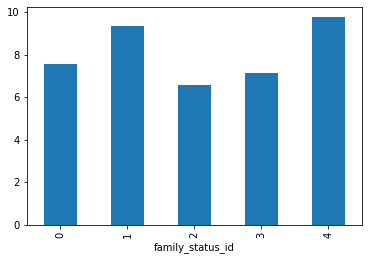

In [30]:
# создание словаря о семейном положении
family_status_dict ={'женат / замужем':0, 'гражданский брак':1, 'вдовец / вдова':2, 'в разводе':3,
 'Не женат / не замужем':4}
family_status_series = pd.Series(family_status_dict)

display(family_status_series.to_frame())

# группирование и создание серий
family_corr_debt_full = credit_data_num[credit_data_num['debt']==1].groupby('family_status_id').agg('count')
family_corr_paid_full = credit_data_num[credit_data_num['debt']==0].groupby('family_status_id').agg('count')
family_corr_debt = family_corr_debt_full['debt']
family_corr_paid = family_corr_paid_full['debt']
family_corr_paid = family_corr_paid.rename('paid')

# создание таблицы с точными числами
family_corr_nums = pd.DataFrame([family_corr_debt, family_corr_paid])
family_corr_nums = family_corr_nums.transpose()


# объявление и применение функции для подсчёта процента людей каждой группы, вернувших кредит в срок
def category_percents(row):
    return row['total_income_id']/len(credit_data_num[credit_data_num['family_status_id']==row.name])*100
    

family_corr_debt_percents = family_corr_debt_full.apply(category_percents, axis=1)
family_corr_paid_percents = family_corr_paid_full.apply(category_percents, axis=1)

# создание таблицы с процентами
family_corr_percents = pd.DataFrame([family_corr_debt_percents, family_corr_paid_percents])
family_corr_percents = family_corr_percents.transpose()
family_corr_percents = family_corr_percents.rename(columns={0:'debt (%)', 1:'paid (%)'})

# создание общей таблицы
family_corr = family_corr_nums.join(family_corr_percents)
display(family_corr)

family_corr_debt_percents.plot.bar()

# Повторяю пожсчёт, используясь новым способом с pd.pivot_table()

display(family_status_series.to_frame())
family_status_df = pd.pivot_table(credit_data, index='family_status_id', values='debt', aggfunc=['count', 'sum', 'mean' ])
display(family_status_df)

for key, percent in zip(family_status_dict, family_status_df['mean']['debt']):
    print(f'Процент заёмщиков, семейное положение которых {key}, не вернувших кредит в срок: {percent*100:.4f}%')
    
print('\n\n', 'Процент задолженности по семейному положению:')


**Вывод**

Результаты анализа показаны выше. Получается, что оригинальный подход тоже работал, но подход с сводной таблицой гораздо проще и быстрее.

Данные показывают, что самый маленький процент задолженности – у группы с семейным положением 'вдовец/вдова', процент: 6.57%

Самый большой процент задолженности – у группы с с семейным положением 'не женат/не замужем', процент: 9.75%

Разница между этими циффрами (и другими циффрами показанными выше) может показаться маленькой, но когда речь идёт о тысячах заёмщиков, это малая разница может иметь достаточно большое значение для банка.

Данные показывают, что действительно существует зависимость между семейным положением и возвратом кредита в срок.



**- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [31]:
# Подсчёт коррелации возврата кредита в срок с уровнем дохода
# correlations = credit_data_num.corr()
# print("Коррелация между возвратом кредит в срок и уровнем дохода:", correlations['debt']['total_income_id'], '\n')

# print('\n')

# display(credit_data_num[credit_data_num['debt']==1].groupby('total_income_id').agg('count')['debt'].to_frame())

display(income_series.to_frame())
total_income_df = pd.pivot_table(credit_data, index='total_income_id', values='debt', aggfunc=['count', 'sum', 'mean' ])
display(total_income_df)

#income_dict = {'<30k':0, '30k-70k':1, '70k-100k':2, '100k-150k':3, '150k-200k':4, '>200k':5}

for key, percent in zip(income_dict, total_income_df['mean']['debt']):
    print(f'Процент заёмщиков, у которых зарплата {key}, не вернувших кредит в срок: {percent*100:.4f}%')

,0
income,
<30k,0
30k-70k,1
70k-100k,2
100k-150k,3
150k-200k,4
>200k,5


,count,sum,mean
,debt,debt,debt
total_income_id,,,
0,22,2,0.090909
1,1452,99,0.068182
2,2989,253,0.084644
3,7160,624,0.087151
4,4764,405,0.085013
5,5067,358,0.070653


Процент заёмщиков, у которых зарплата <30k, не вернувших кредит в срок: 9.0909%
Процент заёмщиков, у которых зарплата 30k-70k, не вернувших кредит в срок: 6.8182%
Процент заёмщиков, у которых зарплата 70k-100k, не вернувших кредит в срок: 8.4644%
Процент заёмщиков, у которых зарплата 100k-150k, не вернувших кредит в срок: 8.7151%
Процент заёмщиков, у которых зарплата 150k-200k, не вернувших кредит в срок: 8.5013%
Процент заёмщиков, у которых зарплата >200k, не вернувших кредит в срок: 7.0653%


**Вывод**

Результаты анализа показаны выше.

Данные показывают, что зарплатная группа, у которой самый маленький процент задолженности – заёмщики с месячной зарплатой 30k-70k, процент: 6.82%

Группа с самым высоким процентом задолженности – заёмщики с самой мальенкой зарплатой (<30k), процент: 9.09%

Однако, на втором месте по задолженности – заёмщики с зарплатой 150k-200k, процент: 8.82%

Разницы между этими циффрами могут показаться маленькими, но когда речь идёт о тысячах заёмщиков, это малая разница может иметь достаточно большое значение для банка. Это тем более правда для группы с зарплатой 150k-200k, поскольку это группа наверняка берёт в кредит бОльую сумму нежели берёт группа с самой маленькой зарплатой.

Данные показывают, что действительно существует зависимость между уровнем дохода и возвратом кредита в срок.


**- Как разные цели кредита влияют на его возврат в срок?**

,0
purpose,
частная недвижимость,0
коммерческая недвижимость,1
автомобиль,2
образование,3
свадьба,4


,debt,paid,debt (%),paid (%)
purpose_id,,,,
0,683,8817,7.189474,92.810526
1,99,1212,7.551487,92.448513
2,403,3903,9.359034,90.640966
3,370,3643,9.220035,90.779965
4,186,2138,8.003442,91.996558


,count,sum,mean
,debt,debt,debt
purpose_id,,,
0,9500,683,0.071895
1,1311,99,0.075515
2,4306,403,0.093590
3,4013,370,0.092200
4,2324,186,0.080034


Процент заёмщиков, цель кредита которых частная недвижимость, не вернувших кредит в срок: 7.1895%
Процент заёмщиков, цель кредита которых коммерческая недвижимость, не вернувших кредит в срок: 7.5515%
Процент заёмщиков, цель кредита которых автомобиль, не вернувших кредит в срок: 9.3590%
Процент заёмщиков, цель кредита которых образование, не вернувших кредит в срок: 9.2200%
Процент заёмщиков, цель кредита которых свадьба, не вернувших кредит в срок: 8.0034%


 Процент задолженности по целям кредита:


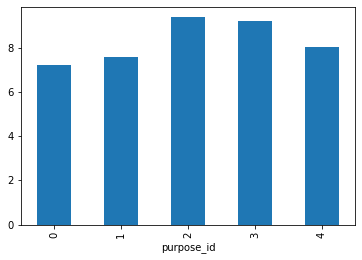

In [32]:
display(purpose_series.to_frame())

# группирование и создание серий
purpose_corr_debt_full = credit_data_num[credit_data_num['debt']==1].groupby('purpose_id').agg('count')
purpose_corr_paid_full = credit_data_num[credit_data_num['debt']==0].groupby('purpose_id').agg('count')
purpose_corr_debt = purpose_corr_debt_full['debt']
purpose_corr_paid = purpose_corr_paid_full['debt']
purpose_corr_paid = purpose_corr_paid.rename('paid')

# создание таблицы с точными числами
purpose_corr_nums = pd.DataFrame([purpose_corr_debt, purpose_corr_paid])
purpose_corr_nums = purpose_corr_nums.transpose()


# объявление и применение функции для подсчёта процента людей каждой группы, вернувших кредит в срок
def category_percents(row):
    return row['total_income_id']/len(credit_data_num[credit_data_num['purpose_id']==row.name])*100
    

purpose_corr_debt_percents = purpose_corr_debt_full.apply(category_percents, axis=1)
purpose_corr_paid_percents = purpose_corr_paid_full.apply(category_percents, axis=1)

# создание таблицы с процентами
purpose_corr_percents = pd.DataFrame([purpose_corr_debt_percents, purpose_corr_paid_percents])
purpose_corr_percents = purpose_corr_percents.transpose()
purpose_corr_percents = purpose_corr_percents.rename(columns={0:'debt (%)', 1:'paid (%)'})

# создание общей таблицы
purpose_corr = purpose_corr_nums.join(purpose_corr_percents)
display(purpose_corr)

purpose_corr_debt_percents.plot.bar()

# Повторяю пожсчёт, используясь новым способом с pd.pivot_table()
purpose_id_df = pd.pivot_table(credit_data, index='purpose_id', values='debt', aggfunc=['count', 'sum', 'mean' ])
display(purpose_id_df)

for key, percent in zip(purpose_dict, purpose_id_df['mean']['debt']):
    print(f'Процент заёмщиков, цель кредита которых {key}, не вернувших кредит в срок: {percent*100:.4f}%')
    
print('\n\n', 'Процент задолженности по целям кредита:')

**Вывод**

Результаты анализа показаны выше. Получается, что оригинальный подход тоже работал, но подход с сводной таблицой гораздо проще и быстрее.

Данные показывают, что самый маленький процент задолженности – у группы с целью кредита связанной с частной недвижимостью, процент: 7.19%

Самый большой процент задолженности – у группы с целью кредита связанной с автомобилем, процент: 9.34%


Разница между этими циффрами (и другими циффрами показанными выше) может показаться маленькой, но когда речь идёт о тысячах заёмщиков, это малая разница может иметь достаточно большое значение для банка. Интересно, что у обеих групп с целью кредита, связанной с недвижимостью, самые низкие проценты задолженности. 

Это тем более правда для группы с зарплатой 150k-200k, поскольку это группа наверняка берёт в кредит бОльую сумму нежели берёт группа с самой маленькой зарплатой.

Данные показывают, что действительно существует зависимость между уровнем дохода и возвратом кредита в срок.

## Общий вывод

Данные показывают, что действительно существует зависимость между возвратом кредита в срок и наличием детей, семейным положением, уровнем дохода, и целью кредита. Тем не менее, можно глубже исследовать это вопрос чтобы получить более подробную информацию.

Есть несколько идеи о том, как можно дальше расследовать вопрос о том, что именно влияет на возврат кредита в срок.

Первая и более доступная, это смотреть на влияние на возврат кредита в срок когда те или иные данные совпадают. Например, можно сравнивать возврат кредита тех людей, у которые женаты и у которых нет детей но есть высокая месячная зарплата, с людьми, которые в разводе и у которых есть детей и маленькая зарплата. Это просто пример, а если пойти таким путём, надо было бы лучше обдумывать этот подход.

Вторая идея, это то, что наверно есть тут психологический момент. Например, если можно было бы получить данные о месячной зарплате родителей заёмщиков, при том когда сами заёмщики были детьми, возможно получили бы информацию об отношении заёмщиков к финансовым вопросам, с которыми конечно связано вопрос возврата кредита в срок. Ещё один пример психологического момента это то, что данные об употреблении алкоголя и наркотиков наверно были бы полезны. 

Третья идея касается года взайма. Возможно, что макроэкономические тенденции влияли на возврат кредита в срок. Мы не знаем, когда данные здесь были получены, а тоже не знаем, за период скольких лет они содержат информацию. С такой информацией, можно было бы ещё раз посмотреть заданные вопросы. Насчёт влияния этих более глобальных аспектов жизни, можно тоже рассмотреть географические данные. Возможно, что в разных местах люди по разному возвращают кредит, либо по локальным экономическим причинам, либо по культурным причинам, либо по чему-то ещё.